# Linear Regression- Score Prediction Based On Number of Study Hours

In [1]:
#Importing libraries and packages
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Reading data from external link
url = "http://bit.ly/w-data"
s_data = pd.read_csv(url)
print("Successfully imported the data")
s_data.head(10)

Successfully imported the data


,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


Now we will plot our dataset and visualise it using 2-D scatter plot to find relationship between two variables.

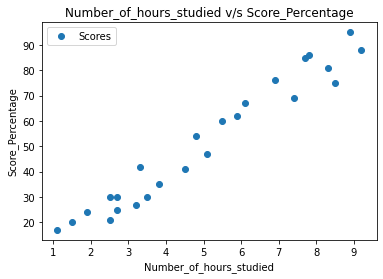

In [3]:
s_data.plot(x='Hours',y='Scores',style = 'o')
plt.title('Number_of_hours_studied v/s Score_Percentage')
plt.xlabel('Number_of_hours_studied')
plt.ylabel('Score_Percentage')
plt.show()

From above observations, scatter plot clearly shows a positive relationship between number of hours studied and percentage of score. Now we will prepare the data while dividing data into "attributes" (inputs) and "labels" (outputs).

In [4]:
X = s_data.iloc[:, :-1].values  
y = s_data.iloc[:, 1].values  

Now that we are ready with attributes and labels, next step we will split our given data into training set and test set. We will perform this by making use of scikit-learn's built-in train_test_split() method:

In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state = 0)

#Training the Algorithm
Now we have split our data into training and test set. Now further we will train the algorithm.

In [6]:
from sklearn.linear_model import LinearRegression

In [7]:
Regressor1 = LinearRegression()
Regressor1.fit(X,y)
print( "Training_model")

Training_model


In [8]:
# Plotting the regression line
line = Regressor1.coef_*X+Regressor1.intercept_

In [9]:
# PLOTTING FOR TEST

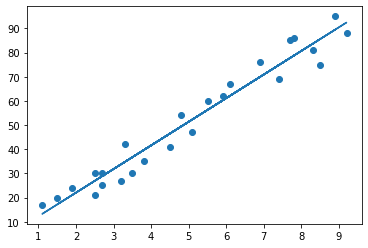

In [10]:
plt.scatter(X,y)
plt.plot(X,line);
plt.show()

Predictions

In [11]:
print(X_test) # Testing Data
y_pred = Regressor1.predict(X_test)

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [12]:
# Comparing Actual value vs Predicted value
df = pd.DataFrame({'Actual':y_test,'Predicted': y_pred})
df

,Actual,Predicted
0,20,17.147378
1,27,33.766244
2,69,74.824618
3,30,26.923182
4,62,60.160913


In [13]:
print("Training Score ", Regressor1.score(X_train,y_train))
print("Testing Score", Regressor1.score (X_test,y_test))

Training Score  0.9512837351709387
Testing Score 0.9491748734859171


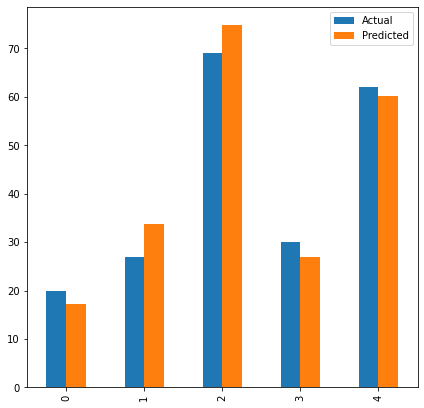

In [14]:
# #Plotting the bar chart to depict the actual and predicted value
df.plot(kind = 'bar', figsize = (7,7))
plt.show()

In [15]:
#Prediction Score for 9.25 hours 
hours = 9.25
test = np.array([hours])
test = test.reshape(-1, 1)
own_pred = Regressor1.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 92.90985477015731


# Evaluating Score

In [16]:
import numpy as np
from sklearn import metrics
print('Mean Absolute Error: ',metrics.mean_absolute_error(y_test,y_pred))
print('Mean Squared Error: ',metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Squared Error: ',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Explained Variance Score: ',metrics.explained_variance_score(y_test,y_pred))

Mean Absolute Error:  4.071877793635608
Mean Squared Error:  20.1389481299402
Root Mean Squared Error:  4.487643939746134
Explained Variance Score:  0.951522433518808


Above final step was done to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset.